In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import matplotlib.ticker as ticker
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%matplotlib inline
pp.style.use('seaborn-ticks')

In [3]:
# Read in bin data
data = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_1d_bins.csv')

In [4]:
data.head()

,bin_num,theta_x,theta_y,theta_cut_x,theta_cut_y,phi_x,phi_y,phi_cut_x,phi_cut_y,nu_x,nu_y,nu_cut_x,nu_cut_y
0,1,0.97015,0,0.97015,0,-22.275,0,-22.275,0,6,40656,6,14138
1,2,0.97045,0,0.97045,0,-21.825,0,-21.825,0,18,46925,18,16200
2,3,0.97075,0,0.97075,0,-21.375,0,-21.375,0,30,47682,30,16503
3,4,0.97105,0,0.97105,0,-20.925,0,-20.925,0,42,48152,42,16418
4,5,0.97135,0,0.97135,0,-20.475,0,-20.475,0,54,48427,54,16152


In [4]:
data['theta_y_err'] = np.sqrt(data.theta_y)
data['theta_cut_y_err'] = np.sqrt(data.theta_cut_y)
data['phi_y_err'] = np.sqrt(data.phi_y)
data['phi_cut_y_err'] = np.sqrt(data.phi_cut_y)
data['nu_y_err'] = np.sqrt(data.nu_y)
data['nu_cut_y_err'] = np.sqrt(data.nu_cut_y)

In [5]:
data['r_theta'] = data.theta_cut_y/data.theta_y
data['r_phi'] = data.phi_cut_y/data.phi_y
data['r_nu'] = data.nu_cut_y/data.nu_y

In [6]:
data['r_theta_err'] = np.sqrt(np.square(data.r_theta)*(np.square(data.theta_y_err/data.theta_y)+np.square(data.theta_cut_y_err/data.theta_cut_y)))
data['r_phi_err'] = np.sqrt(np.square(data.r_phi)*(np.square(data.phi_y_err/data.phi_y)+np.square(data.phi_cut_y_err/data.phi_cut_y)))
data['r_nu_err'] = np.sqrt(np.square(data.r_nu)*(np.square(data.nu_y_err/data.nu_y)+np.square(data.nu_cut_y_err/data.nu_cut_y)))

In [8]:
data.head()

,bin_num,theta_x,theta_y,theta_cut_x,theta_cut_y,phi_x,phi_y,phi_cut_x,phi_cut_y,nu_x,...,phi_y_err,phi_cut_y_err,nu_y_err,nu_cut_y_err,r_theta,r_phi,r_nu,r_theta_err,r_phi_err,r_nu_err
0,1,0.97015,0,0.97015,0,-22.275,0,-22.275,0,6,...,0.0,0.0,201.633331,118.903322,NaN,NaN,0.347747,NaN,NaN,0.003395
1,2,0.97045,0,0.97045,0,-21.825,0,-21.825,0,18,...,0.0,0.0,216.621790,127.279221,NaN,NaN,0.345232,NaN,NaN,0.003146
2,3,0.97075,0,0.97075,0,-21.375,0,-21.375,0,30,...,0.0,0.0,218.362085,128.464003,NaN,NaN,0.346105,NaN,NaN,0.003126
3,4,0.97105,0,0.97105,0,-20.925,0,-20.925,0,42,...,0.0,0.0,219.435640,128.132744,NaN,NaN,0.340962,NaN,NaN,0.003081
4,5,0.97135,0,0.97135,0,-20.475,0,-20.475,0,54,...,0.0,0.0,220.061355,127.090519,NaN,NaN,0.333533,NaN,NaN,0.003031


In [7]:
ratios = pd.DataFrame()

In [8]:
ratios['bin_num'] = data.bin_num
ratios['theta'] = data.theta_x
ratios['r_theta'] = data.r_theta.fillna(0)
ratios['r_theta_err'] = data.r_theta_err.fillna(0)
ratios['phi'] = data.phi_x
ratios['r_phi'] = data.r_phi.fillna(0)
ratios['r_phi_err'] = data.r_phi_err.fillna(0)
ratios['nu'] = data.nu_x
ratios['r_nu'] = data.r_nu.fillna(0)
ratios['r_nu_err'] = data.r_nu_err.fillna(0)

In [15]:
ratios.head()

,bin_num,theta,r_theta,r_theta_err,phi,r_phi,r_phi_err,nu,r_nu,r_nu_err
0,1,0.97015,0.0,0.0,-22.275,0.0,0.0,6,0.347747,0.003395
1,2,0.97045,0.0,0.0,-21.825,0.0,0.0,18,0.345232,0.003146
2,3,0.97075,0.0,0.0,-21.375,0.0,0.0,30,0.346105,0.003126
3,4,0.97105,0.0,0.0,-20.925,0.0,0.0,42,0.340962,0.003081
4,5,0.97135,0.0,0.0,-20.475,0.0,0.0,54,0.333533,0.003031


In [16]:
ratios.to_csv('data/Qweak_Aluminum_Acceptance.csv')

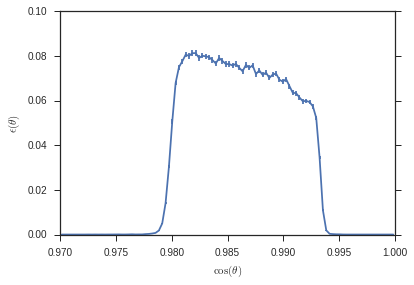

In [9]:
pp.figure()
ax = pp.subplot(1, 1, 1)
pp.errorbar(data.theta_x, data.r_theta.fillna(0), yerr=data.r_theta_err.fillna(0))
pp.xlabel('$\cos(\\theta)$')
pp.ylabel('$\epsilon(\\theta)$')
pp.tick_params(top=False)
pp.ylim(0.0, 0.1)
pp.savefig('plots/Qweak_Aluminum_Theta_Acceptance.png', bbox_inches='tight')
pp.show()

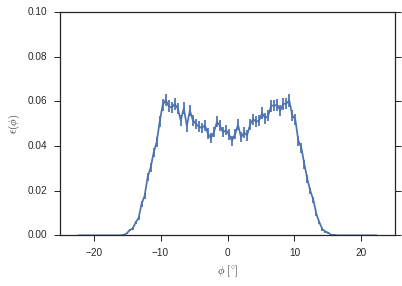

In [10]:
pp.figure()
ax = pp.subplot(1, 1, 1)
pp.errorbar(data.phi_x, data.r_phi.fillna(0), yerr=data.r_phi_err.fillna(0))
pp.xlabel('$\phi$ $[^{\circ}]$')
pp.ylabel('$\epsilon(\phi)$')
pp.tick_params(top=False)
pp.xlim(-25.0, 25.0)
pp.ylim(0.0, 0.1)
pp.savefig('plots/Qweak_Aluminum_Phi_Acceptance.png', bbox_inches='tight')
pp.show()

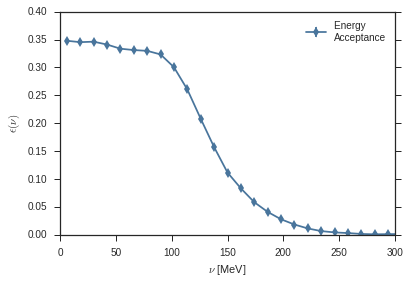

In [10]:
pp.figure()
ax = pp.subplot(1, 1, 1)
pp.errorbar(data.nu_x, 
            data.r_nu.fillna(0), 
            yerr=data.r_nu_err.fillna(0), 
            color=sns.xkcd_rgb['dull blue'], 
            capsize=0.5, 
            capthick=0.2, 
            marker='d', 
            label='Energy \nAcceptance')
pp.xlabel('$\\nu$ [MeV]')
pp.ylabel('$\epsilon(\\nu)$')
pp.tick_params(top=False)
pp.xlim(0.0, 300.0)
pp.ylim(0.0, 0.4)
pp.legend(loc='upper right')
pp.savefig('plots/Qweak_Aluminum_Nu_Acceptance.png', bbox_inches='tight')
pp.savefig('plots/Qweak_Aluminum_Nu_Acceptance.pdf', bbox_inches='tight')
pp.show()

In [14]:
theta_phi = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_theta_phi.csv', header=0, index_col=0)
theta_phi_cut = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_theta_phi_cut.csv', header=0, index_col=0)
theta_nu = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_theta_nu.csv', header=0, index_col=0)
theta_nu_cut = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_theta_nu_cut.csv', header=0, index_col=0)
phi_nu = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_phi_nu.csv', header=0, index_col=0)
phi_nu_cut = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_phi_nu_cut.csv', header=0, index_col=0)

In [51]:
phi_nu_cut.head()

,-22.275,-21.825,-21.375,-20.925,-20.475,-20.025,-19.575,-19.125,-18.675,-18.225,...,18.225,18.675,19.125,19.575,20.025,20.475,20.925,21.375,21.825,22.275
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
theta_phi_cut.head()

,0.97015,0.97045,0.97075,0.97105,0.97135,0.97165,0.97195,0.97225,0.97255,0.97285,...,0.99715,0.99745,0.99775,0.99805,0.99835,0.99865,0.99895,0.99925,0.99955,0.99985
-22.275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-21.825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-21.375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-20.925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-20.475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
ratio_theta_phi = theta_phi_cut/theta_phi
ratio_theta_nu = theta_nu_cut/theta_nu
ratio_phi_nu = phi_nu_cut/phi_nu

In [103]:
ratio_theta_phi.head()

,0.97015,0.97045,0.97075,0.97105,0.97135,0.97165,0.97195,0.97225,0.97255,0.97285,...,0.99715,0.99745,0.99775,0.99805,0.99835,0.99865,0.99895,0.99925,0.99955,0.99985
-22.275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-21.825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-21.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-20.925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-20.475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


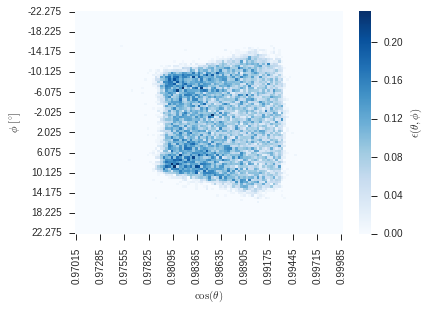

In [16]:
fig = pp.figure()
ax = pp.subplot(1, 1, 1)
sns.heatmap(ratio_theta_phi.fillna(0), xticklabels=9, yticklabels=9, cmap='Blues' , cbar_kws={'label' : '$\epsilon(\\theta,\phi)$'})
pp.xlabel('$\cos(\\theta)$')
pp.ylabel('$\phi$ $[^{\circ}]$')
pp.savefig('plots/Qweak_Aluminum_Theta_Phi_Acceptance.png', bbox_inches='tight')
pp.show()

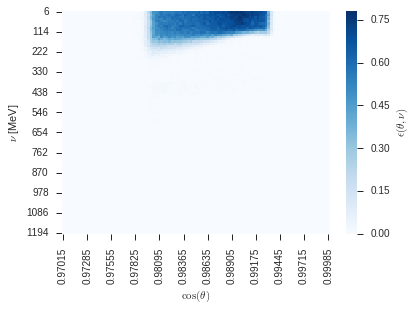

In [17]:
fig = pp.figure()
ax = pp.subplot(1, 1, 1)
sns.heatmap(ratio_theta_nu.fillna(0), xticklabels=9, yticklabels=9, cmap='Blues', cbar_kws={'label' : '$\epsilon(\\theta,\\nu)$'})
pp.xlabel('$\cos(\\theta)$')
pp.ylabel('$\\nu$ [MeV]')
pp.savefig('plots/Qweak_Aluminum_Theta_Nu_Acceptance.png', bbox_inches='tight')
pp.show()

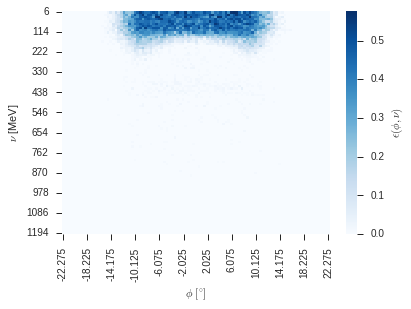

In [18]:
fig = pp.figure()
ax = pp.subplot(1, 1, 1)
sns.heatmap(ratio_phi_nu.fillna(0), xticklabels=9, yticklabels=9, cmap='Blues', cbar_kws={'label' : '$\epsilon(\phi,\\nu)$'})
pp.xlabel('$\phi$ $[^{\circ}]$')
pp.ylabel('$\\nu$ [MeV]')
pp.savefig('plots/Qweak_Aluminum_Phi_Nu_Acceptance.png', bbox_inches='tight')
pp.show()

In [19]:
ratio_theta_phi = ratio_theta_phi.fillna(0)
ratio_theta_nu = ratio_theta_nu.fillna(0)
ratio_phi_nu = ratio_phi_nu.fillna(0)

In [20]:
ratio_theta_phi.to_csv('data/Qweak_Aluminum_Theta_Phi_Acceptance.csv')
ratio_theta_nu.to_csv('data/Qweak_Aluminum_Theta_Nu_Acceptance.csv')
ratio_phi_nu.to_csv('data/Qweak_Aluminum_Phi_Nu_Acceptance.csv')